In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ensure nltk dependencies are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Step 1: Data Exploration and Preprocessing

In [5]:
# Load Dataset
data = pd.read_csv("/content/blogs.csv")
data


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [6]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [9]:
data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [10]:
#Preprocess Text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation and special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

In [12]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
# Ensure all required NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')  # Added to fix the LookupError



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
# Apply preprocessing
data['Processed_Text'] = data['Data'].apply(preprocess_text)
print(data.head())


                                                Data       Labels  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism   

                                      Processed_Text  
0  path cantaloupe srv c cmu edu magnesium club c...  
1  newsgroups alt atheism path cantaloupe srv c c...  
2  path cantaloupe srv c cmu edu da news harvard ...  
3  path cantaloupe srv c cmu edu magnesium club c...  
4  xref cantaloupe srv c cmu edu alt atheism talk...  


In [17]:
data.head()

,Data,Labels,Processed_Text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupe srv c cmu edu magnesium club c...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups alt atheism path cantaloupe srv c c...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupe srv c cmu edu da news harvard ...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupe srv c cmu edu magnesium club c...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupe srv c cmu edu alt atheism talk...


In [18]:
# Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Processed_Text'])
y = data['Labels']

# Step 2: Naive Bayes Model for Text Classification

In [19]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#  Train Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [21]:
#  Make Predictions
y_pred = nb_classifier.predict(X_test)

#Step 3: Sentiment Analysis

In [22]:
# Perform Sentiment Analysis
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [23]:
# Apply sentiment analysis
data['Sentiment'] = data['Data'].apply(get_sentiment)

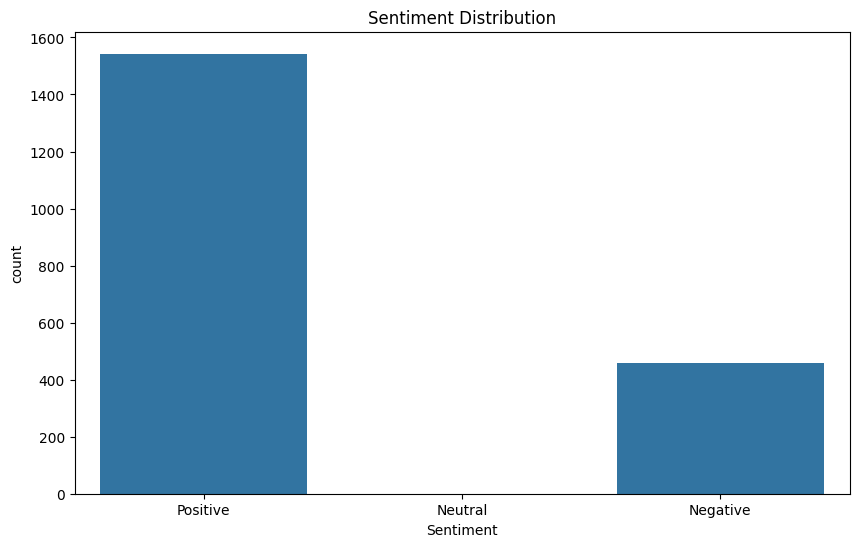

In [24]:
#Visualize Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution")
plt.show()


# Step 4: Evaluation


In [25]:
# Classification Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7975
Precision: 0.8217939178734736
Recall: 0.7975
F1-Score: 0.7843225423076943

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.58      0.83      0.68        18
           comp.graphics       0.82      0.78      0.80        18
 comp.os.ms-windows.misc       0.70      0.95      0.81        22
comp.sys.ibm.pc.hardware       0.73      0.88      0.80        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       1.00      0.24      0.39        25
            misc.forsale       0.88      0.78      0.82        18
               rec.autos       0.81      0.94      0.87        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.89      0.89      0.89        18
        rec.sport.hockey       0.68      1.00      0.81        15
               sci.crypt       0.68      1.00      0.81        19
         sci.electronics 

In [26]:
#  Summarize Sentiment Analysis Insights
sentiment_summary = data.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_summary)

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                   0.23      0.77
comp.graphics                 0.24      0.76
comp.os.ms-windows.misc       0.22      0.78
comp.sys.ibm.pc.hardware      0.20      0.80
comp.sys.mac.hardware         0.24      0.76
comp.windows.x                0.27      0.73
misc.forsale                  0.16      0.84
rec.autos                     0.17      0.83
rec.motorcycles               0.26      0.74
rec.sport.baseball            0.29      0.71
rec.sport.hockey              0.34      0.66
sci.crypt                     0.19      0.81
sci.electronics               0.19      0.81
sci.med                       0.29      0.71
sci.space                     0.27      0.73
soc.religion.christian        0.13      0.87
talk.politics.guns            0.30      0.70
talk.politics.mideast         0.22      0.78
talk.politics.misc            0.22      0.78
talk.religion.misc            0.14      0.86


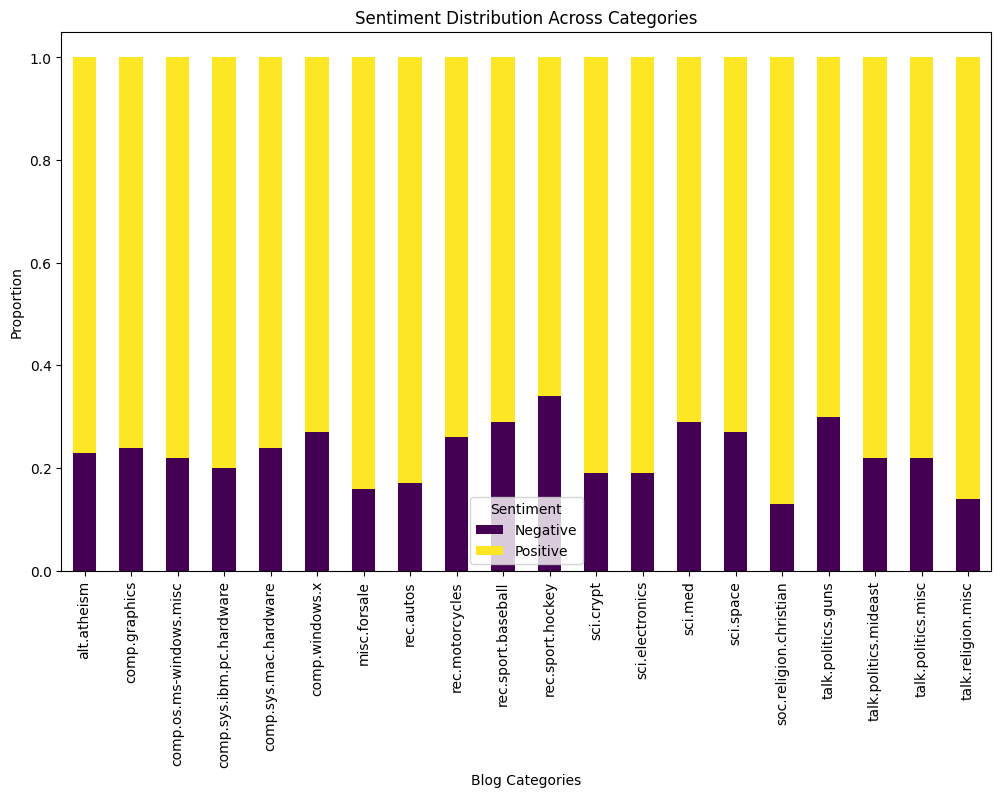

In [27]:
# Plot sentiment distribution by category
sentiment_summary.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title("Sentiment Distribution Across Categories")
plt.ylabel("Proportion")
plt.xlabel("Blog Categories")
plt.show()